In [11]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def load_data(file_path):
    df = pd.read_csv(file_path, encoding='latin-1', low_memory=False)
    df = df[['target', 'text']] 
    df.columns = ['sentiment', 'text']

    # map binary sentiment
    df = df[df['sentiment'].isin([0, 4])]
    df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

    # Drop NaN 
    df = df.dropna(subset=['sentiment'])

    #  balance
    print("Sentiment label distribution:\n", df['sentiment'].value_counts())

    return df


In [19]:
# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    return text


In [21]:
# train Logistic Regression 
def train_model(file_path):
    df = load_data(file_path)
    df['text'] = df['text'].apply(preprocess_text)

    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # convert to percentages

    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (%)')
    plt.show()

    #save
    joblib.dump(model, 'sentiment_logreg.pkl')
    joblib.dump(vectorizer, 'vectorizer.pkl')

    print("Logistic Regression model and vectorizer saved.")


Sentiment label distribution:
 sentiment
0    800000
1    800000
Name: count, dtype: int64
Accuracy: 0.79035625
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



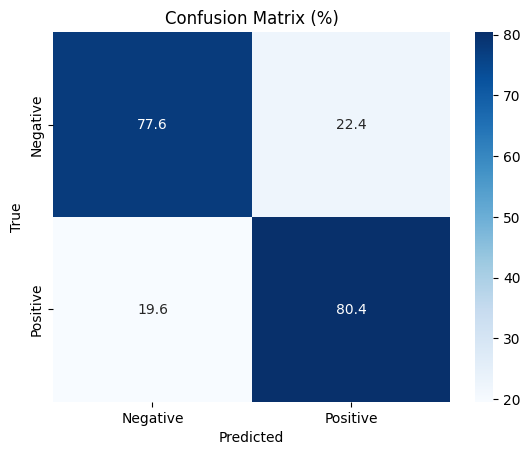

Logistic Regression model and vectorizer saved.


In [22]:
if __name__ == "__main__":
    train_model("tweets.csv") 


Sentiment label distribution:
 sentiment
0    800000
1    800000
Name: count, dtype: int64
Accuracy: 0.503609375
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    159494
           1       0.93      0.01      0.02    160506

    accuracy                           0.50    320000
   macro avg       0.72      0.51      0.34    320000
weighted avg       0.72      0.50      0.34    320000



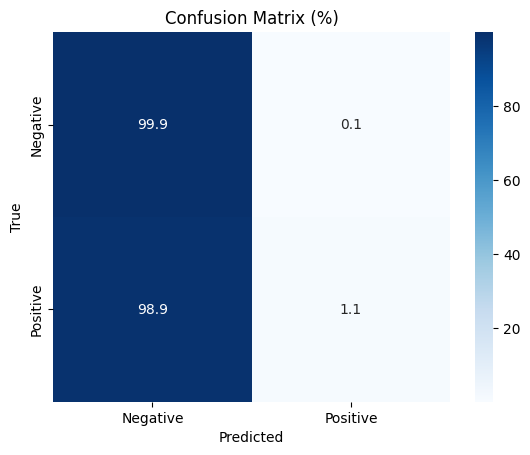

Naive Bayes model and vectorizer saved.


In [1]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_data(file_path):
    df = pd.read_csv(file_path, encoding='latin-1', low_memory=False)
    df = df[['target', 'text']]
    df.columns = ['sentiment', 'text']

    df = df[df['sentiment'].isin([0, 4])]
    df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
    df = df.dropna(subset=['sentiment', 'text'])

    print("Sentiment label distribution:\n", df['sentiment'].value_counts())
    return df

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\\S+', '', text)
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

#train Naive Bayes model
def train_model(file_path):
    df = load_data(file_path)
    df['text'] = df['text'].apply(preprocess_text)

    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes Classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion matrix 
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (%)')
    plt.show()

    #save
    joblib.dump(model, 'sentiment_nb.pkl')
    joblib.dump(vectorizer, 'vectorizer.pkl')

    print("Naive Bayes model and vectorizer saved.")

if __name__ == "__main__":
    train_model("tweets.csv")